In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import secondary_fyncions as sf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [10]:
# Датасет https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand
data = pd.read_csv('Live.csv')
data.drop(labels=['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
data = sf.get_dummies(data, 'status_type', 'status_type')

In [11]:
data.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


In [7]:
data.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [12]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,0.008936,0.608227,0.051773,0.331064
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,0.094115,0.488181,0.221584,0.470629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3b95c0b00>,
      dtype=object)

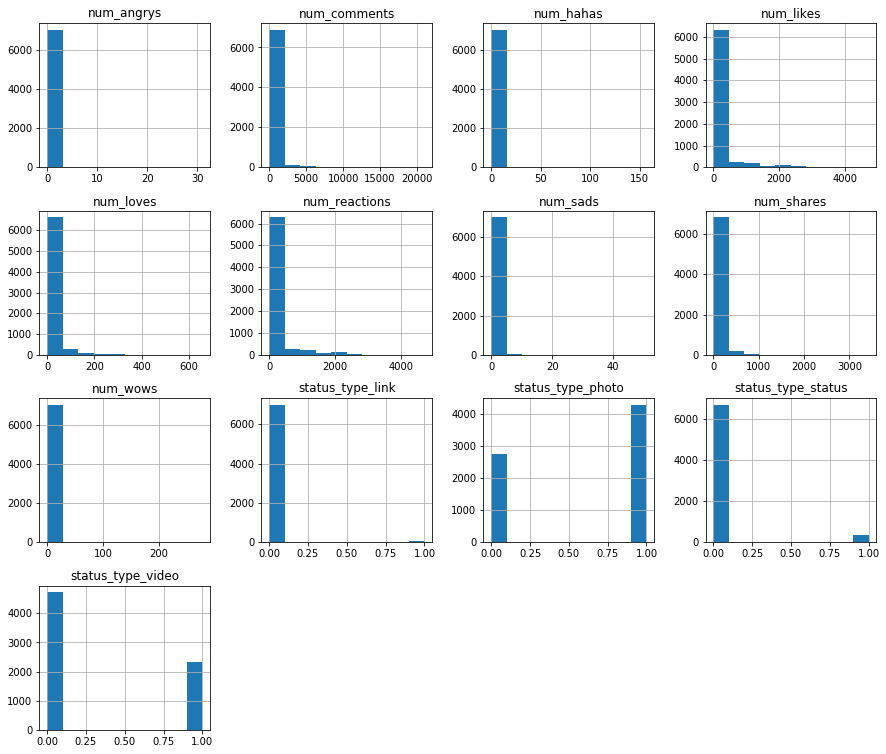

In [14]:
data.hist(figsize=(15,13))

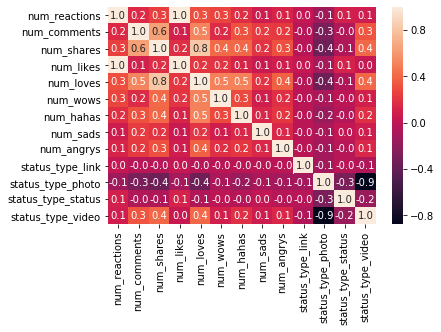

In [15]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')

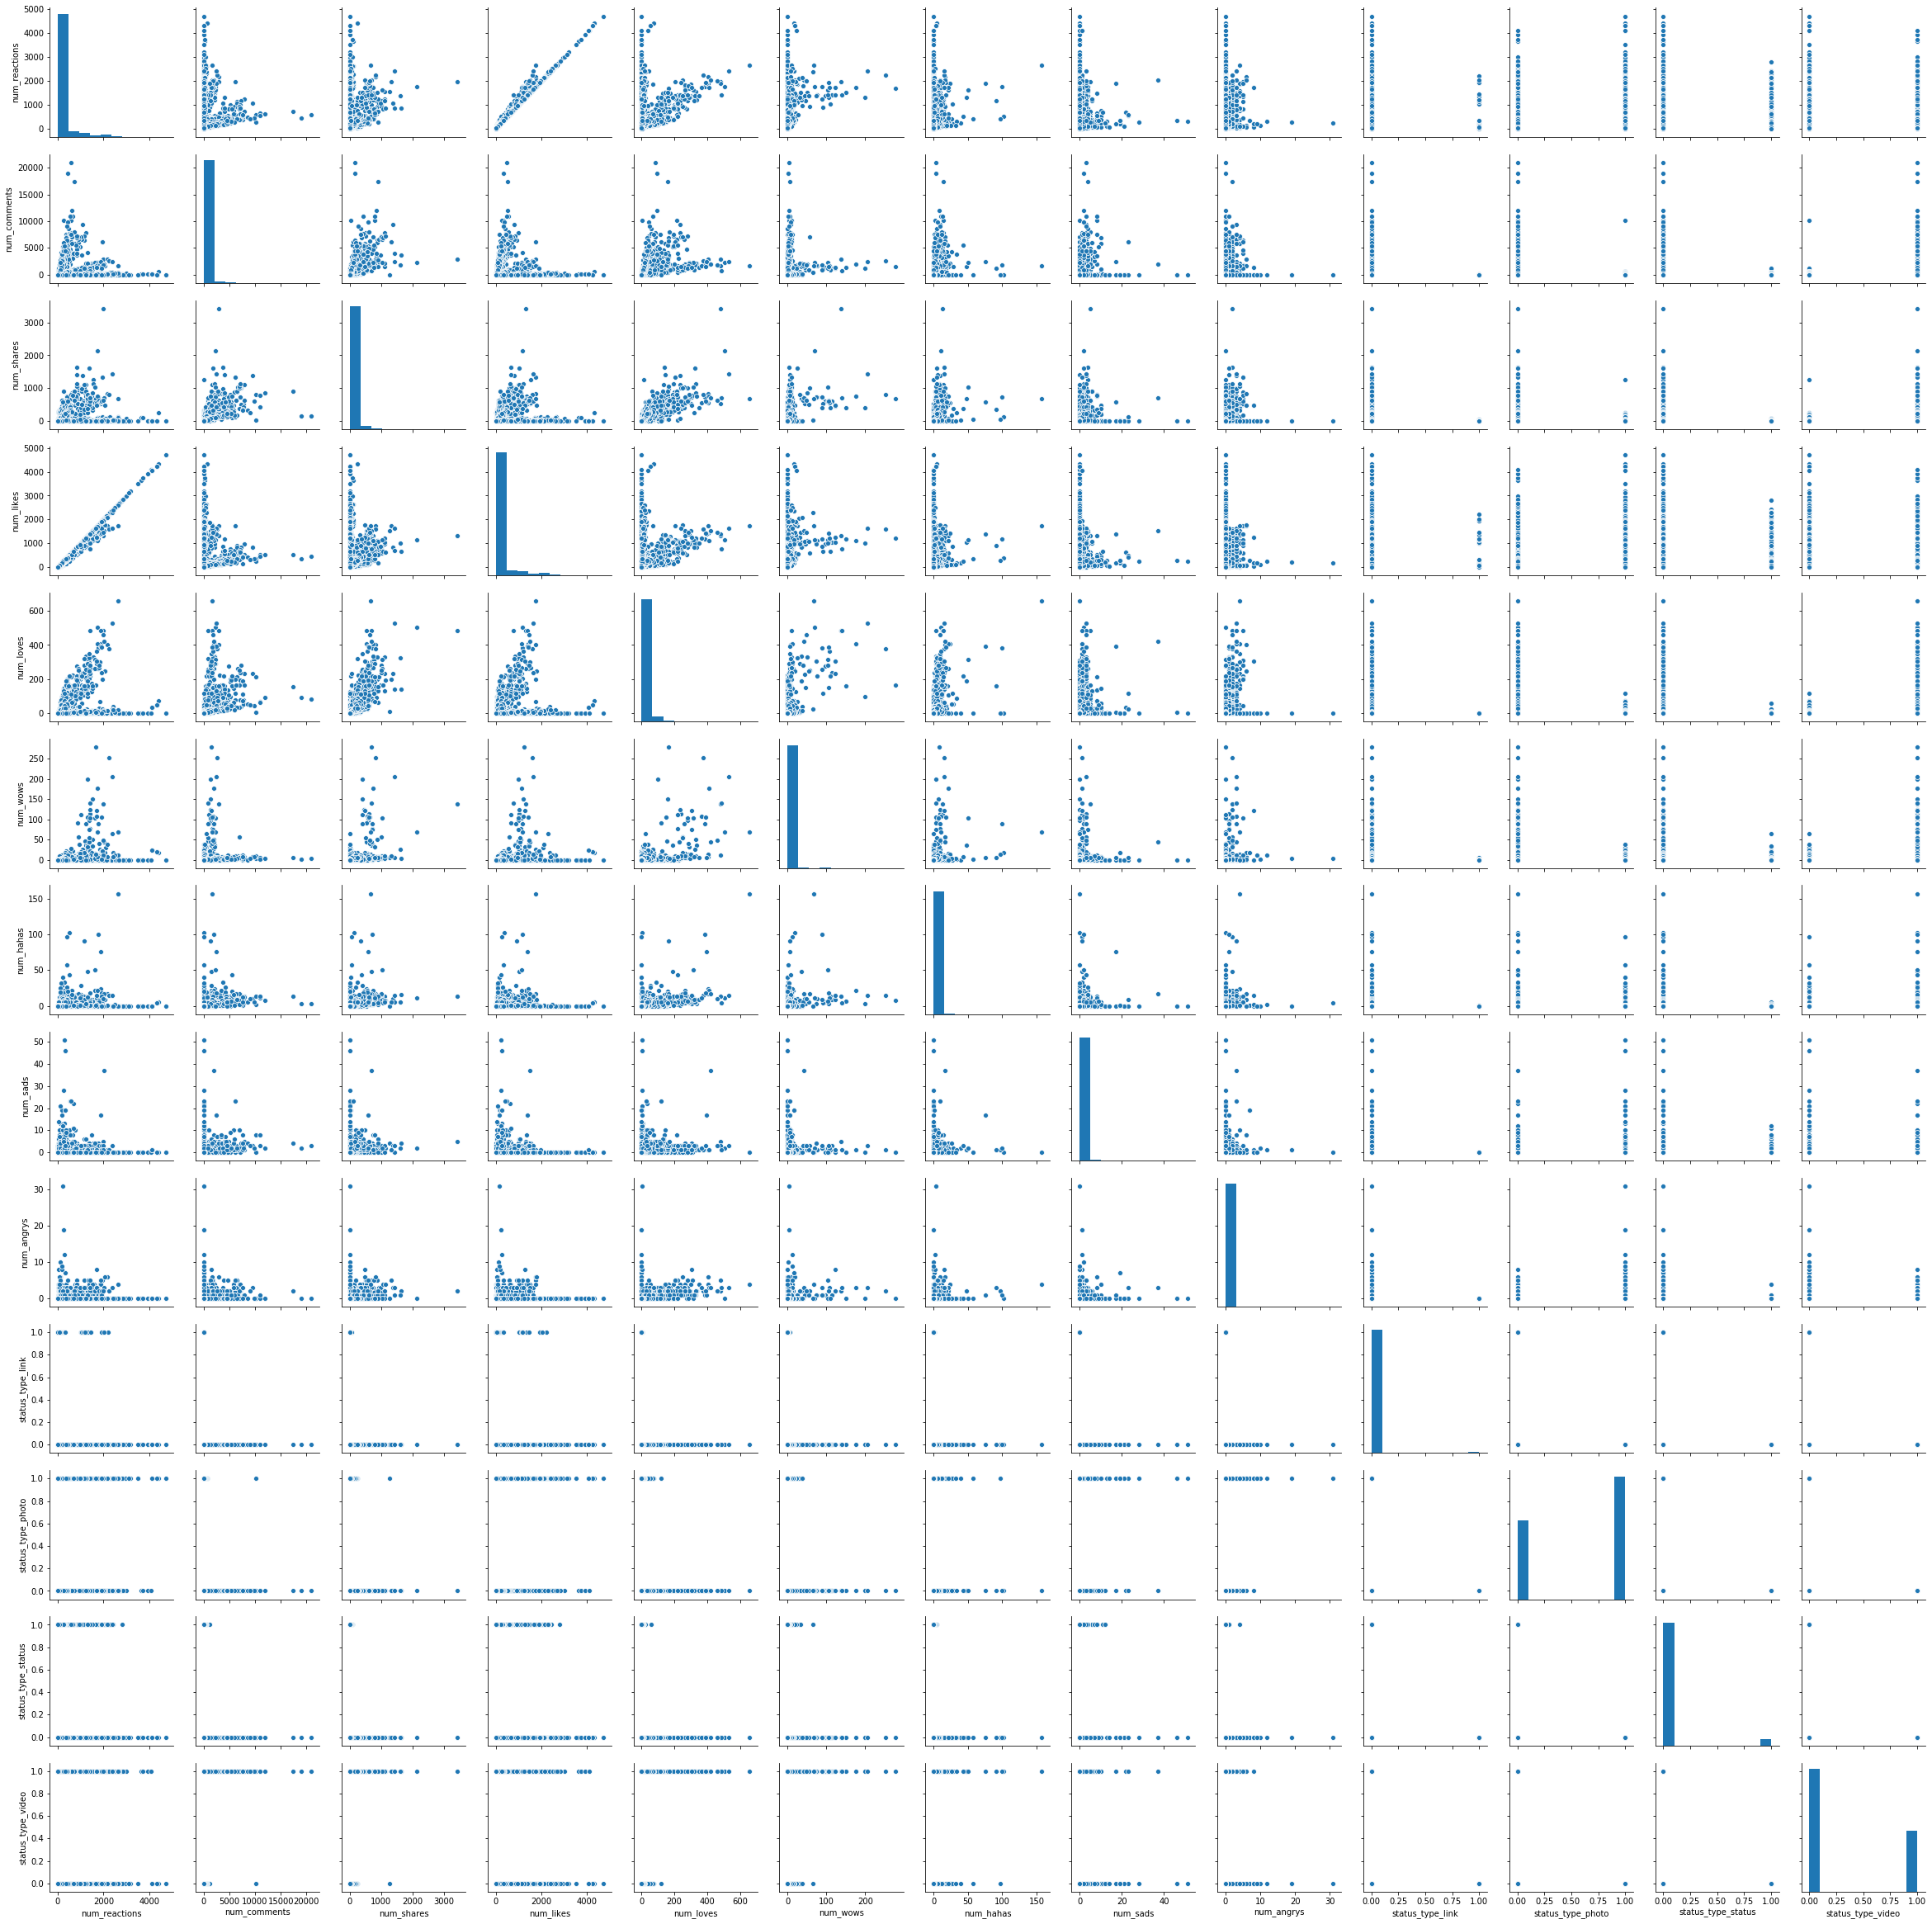

In [17]:
sns.pairplot(data)

# Кластеризация K-Means

In [30]:
scaler = StandardScaler()
data = scaler.fit_transform(data)


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

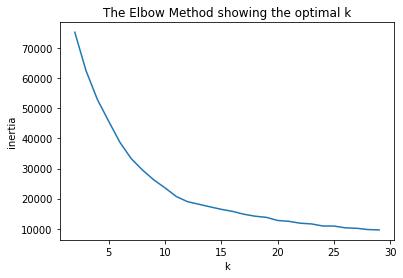

In [31]:
inertia = list()
silhouette = list()
n_clusters = 30
for i in range (2, n_clusters):
    km = KMeans(n_clusters=i).fit(data)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(data, km.labels_))

    
plt.plot(np.arange(2, n_clusters), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

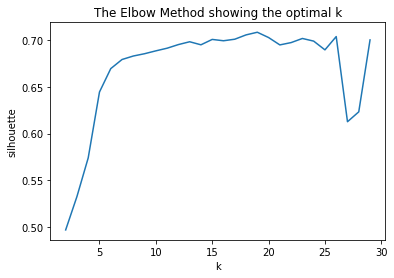

In [32]:
plt.plot(np.arange(2, n_clusters), silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('The Elbow Method showing the optimal k')

Выбрал компромиссное значение числа соседей 20 по инерции и силуэту

# Количество объектов в кластерах

inertia: 13075.348038447251
silhouette: 0.6912958982541396


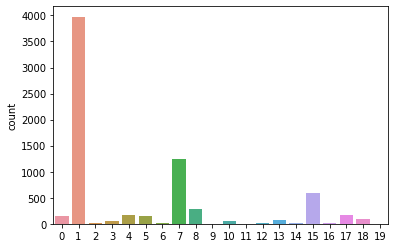

In [33]:
km = KMeans(n_clusters=20).fit(data)
print(f"inertia: {km.inertia_}\nsilhouette: {silhouette_score(data, km.labels_)}")
sns.countplot(km.labels_)